In [2]:
import sqlite3

# Connect to SQLite database (creates sales_data.db if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')

# Insert sample data
sample_data = [
    ('Laptop', 5, 999.99),
    ('Mouse', 20, 19.99),
    ('Keyboard', 10, 49.99),
    ('Laptop', 3, 999.99),
    ('Mouse', 15, 19.99)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Commit changes and close connection
conn.commit()
conn.close()

print("Database 'sales_data.db' created with sales table and sample data.")

Database 'sales_data.db' created with sales table and sample data.


In [3]:
import sqlite3
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM sales')
print(cursor.fetchall())
conn.close()

[(1, 'Laptop', 5, 999.99), (2, 'Mouse', 20, 19.99), (3, 'Keyboard', 10, 49.99), (4, 'Laptop', 3, 999.99), (5, 'Mouse', 15, 19.99)]


Sales by Product:
 product  total_qty  revenue
Keyboard         10   499.90
  Laptop          8  7999.92
   Mouse         35   699.65

Overall Totals:
Total Quantity Sold: 53
Total Revenue: $9,199.47


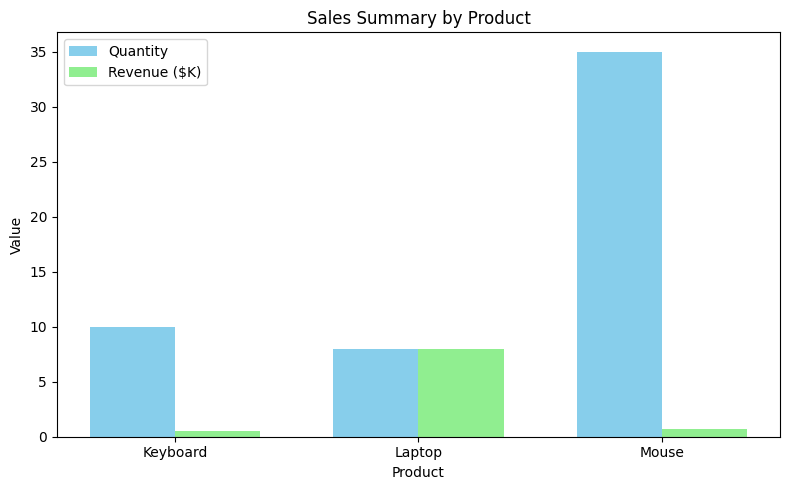

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('sales_data.db')

# Query 1: Total quantity and revenue by product
query1 = '''
    SELECT product,
           SUM(quantity) AS total_qty,
           SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''
df = pd.read_sql_query(query1, conn)

# Query 2: Overall totals
query2 = '''
    SELECT SUM(quantity) AS total_quantity,
           SUM(quantity * price) AS total_revenue
    FROM sales
'''
totals = pd.read_sql_query(query2, conn)

# Print results
print("Sales by Product:")
print(df.to_string(index=False))
print("\nOverall Totals:")
print(f"Total Quantity Sold: {totals['total_quantity'][0]}")
print(f"Total Revenue: ${totals['total_revenue'][0]:,.2f}")

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(df['product']))

# Plot quantity and revenue bars
ax.bar([i - bar_width/2 for i in x], df['total_qty'], bar_width, label='Quantity', color='skyblue')
ax.bar([i + bar_width/2 for i in x], df['revenue']/1000, bar_width, label='Revenue ($K)', color='lightgreen')

# Customize chart
ax.set_xlabel('Product')
ax.set_ylabel('Value')
ax.set_title('Sales Summary by Product')
ax.set_xticks(x)
ax.set_xticklabels(df['product'])
ax.legend()

# Save and show plot
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()

# Close connection
conn.close()

Total Quantity Sold: 58
Total Revenue: $1172.35


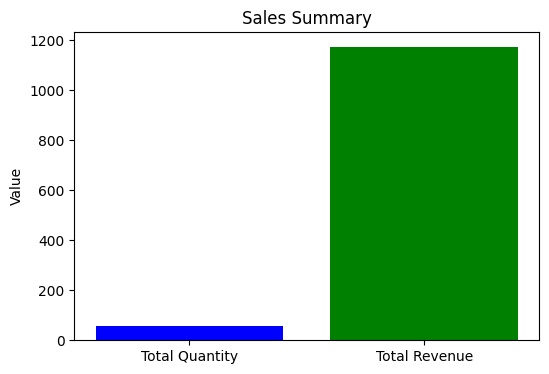

In [5]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# Connect to SQLite database (creates one if it doesn't exist)
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()

# Create sales table and insert sample data
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Clear existing data and insert sample data
cursor.execute('DELETE FROM sales')
sample_data = [
    ('Widget A', 10, 25.99),
    ('Widget B', 15, 15.50),
    ('Widget C', 8, 30.00),
    ('Widget A', 5, 25.99),
    ('Widget B', 20, 15.50)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

# Query total quantity and revenue
cursor.execute('''
    SELECT SUM(quantity) as total_quantity,
           SUM(quantity * price) as total_revenue
    FROM sales
''')
result = cursor.fetchone()
total_quantity, total_revenue = result

# Print results
print(f"Total Quantity Sold: {total_quantity}")
print(f"Total Revenue: ${total_revenue:.2f}")

# Create bar chart
metrics = ['Total Quantity', 'Total Revenue']
values = [total_quantity, total_revenue]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'green'])
plt.title('Sales Summary')
plt.ylabel('Value')
plt.savefig('sales_summary.png')

# Close connection
conn.close()